## 6.2.1 Реккурентный слой в Keras.

In [1]:
# Возвращается результат только для последнего временного интервала.
from keras.layers import SimpleRNN

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 322080 (1.23 MB)
Trainable params: 322080 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [2]:
# Возвращает полную последовательность состояний:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 322080 (1.23 MB)
Trainable params: 322080 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [3]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32)) # последний слой возвращает только последний результат
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 328320 (1.25 MB)
Trainable params: 328320 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
# Листинг 6.22. Подготовка данных IMDB.
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000 # количество слов, рассматриваемых как признаки
maxlen = 500 # обрезка текста после этого количества слов (в числе max_features самых распространенных слов)
batch_size = 32


print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
    num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17464789/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [5]:
# Листинг 6.23. Обучение модели со слоями Embedding и SimpleRNN

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 41s 243ms/step - loss: 0.6830 - acc: 0.5612 - val_loss: 0.6280 - val_acc: 0.6644
Epoch 2/10
157/157 [==============================] - 32s 205ms/step - loss: 0.5210 - acc: 0.7541 - val_loss: 0.4853 - val_acc: 0.7788
Epoch 3/10
157/157 [==============================] - 27s 172ms/step - loss: 0.3549 - acc: 0.8523 - val_loss: 0.3857 - val_acc: 0.8434
Epoch 4/10
157/157 [==============================] - 28s 180ms/step - loss: 0.3052 - acc: 0.8779 - val_loss: 0.4116 - val_acc: 0.8280
Epoch 5/10
157/157 [==============================] - 27s 173ms/step - loss: 0.2166 - acc: 0.9179 - val_loss: 0.4871 - val_acc: 0.8324
Epoch 6/10
157/157 [==============================] - 28s 181ms/step - loss: 0.1686 - acc: 0.9378 - val_loss: 0.4322 - val_acc: 0.8368
Epoch 7/10
157/157 [==============================] - 29s 186ms/step - loss: 0.1230 - acc: 0.9567 - val_loss: 0.6549 - val_acc: 0.7982
Epoch 8/10
157/157 [==============================] - 2

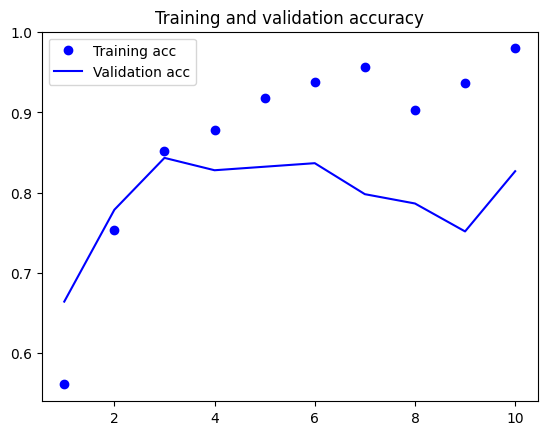

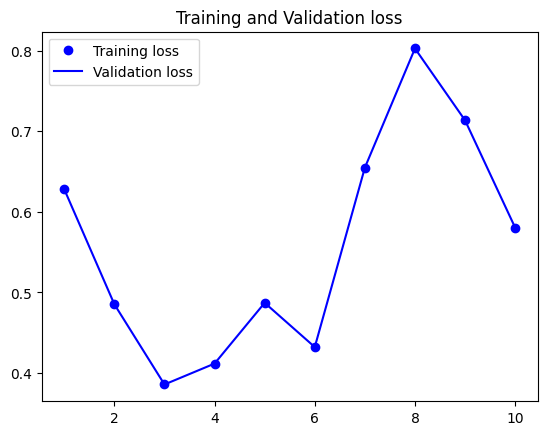

In [6]:
# Листинг 6.24. Вывод результатов.

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['val_loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

## 6.2.2 Слои LSTM и GRU

In [8]:
# Листинг 6.27. Использование слоя LSTM из Keras

from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 63s 384ms/step - loss: 0.6013 - acc: 0.6579 - val_loss: 0.4984 - val_acc: 0.7672
Epoch 2/10
157/157 [==============================] - 65s 416ms/step - loss: 0.3642 - acc: 0.8478 - val_loss: 0.3218 - val_acc: 0.8628
Epoch 3/10
157/157 [==============================] - 60s 380ms/step - loss: 0.2769 - acc: 0.8923 - val_loss: 0.4122 - val_acc: 0.8472
Epoch 4/10
157/157 [==============================] - 59s 376ms/step - loss: 0.2417 - acc: 0.9083 - val_loss: 0.3254 - val_acc: 0.8658
Epoch 5/10
157/157 [==============================] - 62s 398ms/step - loss: 0.2067 - acc: 0.9259 - val_loss: 0.2921 - val_acc: 0.8758
Epoch 6/10
157/157 [==============================] - 65s 416ms/step - loss: 0.1842 - acc: 0.9321 - val_loss: 0.3150 - val_acc: 0.8732
Epoch 7/10
157/157 [==============================] - 58s 368ms/step - loss: 0.1660 - acc: 0.9420 - val_loss: 0.3198 - val_acc: 0.8774
Epoch 8/10
157/157 [==============================] - 5

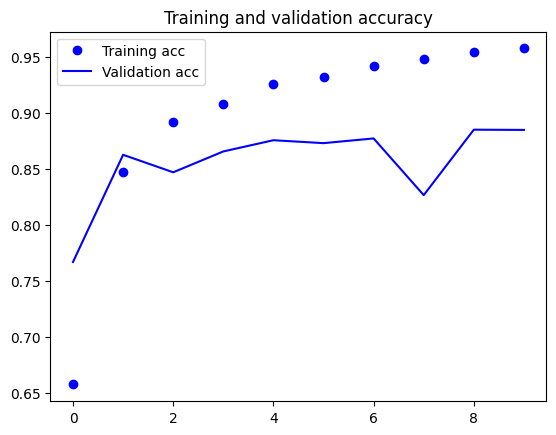

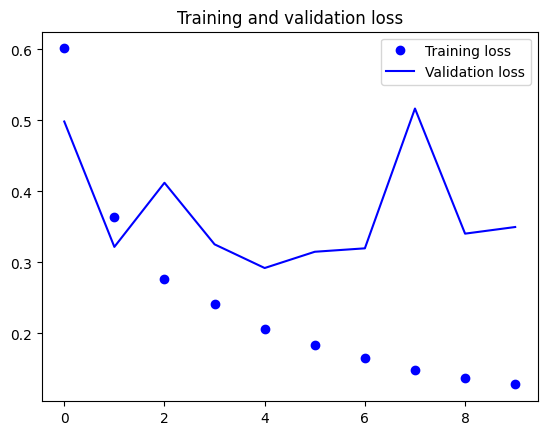

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()